# Assignment 1

## Dataset 


Dataset "BusinessPlanData.dta" is based on simplified version of the dataset collected as part of the field experiment in Niger that is now published in American Economic Review.

The paper is: McKenzie, D. (2017). Identifying and spurring high-growth entrepreneurship: experimental evidence from a business plan competition. American Economic Review, 107(8), 2278-2307.
The paper and the full dataset can be found here: https://www.aeaweb.org/articles?id=10.1257/aer.20151404

Basically, the author runs a field experiment with a pool of entrepreneurs applying to a national business plan competition in Nigeria. The last stage of the selection process randomly selected 720 semi-finalists (out of 1,920 semi-finalists) to win the business plan program. The program consisted of an initial four-day training, a grant paid in four tranches, some mentoring, and two additional two-day training events. The entrepreneurs were then tracked through surveys over a period of five years.
The paper basically compares the group of semi-finalists randomly allocated to the business plan treatment (called ‘treatment’ group) to the control group of all the other semi-finalists who were not allocated to the business plan program.
The published paper looks at whether the business plan treatment had any significant effect on firms’ (self-reported) survival, profits, sales, and employment, but it also contains data on how many hours the entrepreneurs reported to work in their business in a usual week three years after the business plan competition.

Our main variable of interest (the dependent variable) for the task is the variable ‘hoursusualweek’, a continuous variable counting the number of hours that the entrepreneurs worked in a normal week three years after the intervention.

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

### Load BusinessPlanData data in dta format and assign it to a variable 
Hint: It is not mandatory to convert categoricals

In [3]:
df = pd.read_stata('C:/Users/ASUS/Downloads/BusinessPlanData.dta')  
df

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\io\stata.py:1409: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


,uid,sex_applicant,state_origin,state_residence,passfirstround,female,male,northcentral,northeastern,northwestern,...,have_satellite_dishes,region,marker_id,totalmarks,treatment,hourslastweek,hoursusualweek,hiredworkers,website,revenues
0,60803.0,Male,Akwa Ibom,Ebonyi,1.0,0.0,1.0,0.0,0.0,0.0,...,0,North-Eastern,87,38.0,0.0,NaN,NaN,NaN,NaN,NaN
1,103866.0,Male,Abia,Kaduna,1.0,0.0,1.0,0.0,0.0,1.0,...,1,North-Western,88,36.0,0.0,60.0,60.0,0.0,NaN,1600000.0
2,41190.0,Female,Kwara,Abuja,1.0,1.0,0.0,1.0,0.0,0.0,...,1,North-Central,86,49.0,0.0,NaN,NaN,NaN,NaN,NaN
3,61145.0,Male,Kogi,Abuja,1.0,0.0,1.0,1.0,0.0,0.0,...,1,North-Central,72,60.0,0.0,40.0,50.0,2.0,yes,1000000.0
4,34746.0,Male,Akwa Ibom,Akwa Ibom,1.0,0.0,1.0,0.0,0.0,0.0,...,0,South-South,90,70.0,0.0,20.0,16.0,0.0,NaN,800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,18221.0,Male,Edo,Edo,1.0,0.0,1.0,0.0,0.0,0.0,...,1,South-South,90,60.0,1.0,65.0,70.0,10.0,NaN,9100000.0
1837,68360.0,Male,Ogun,Plateau,1.0,0.0,1.0,1.0,0.0,0.0,...,1,North-Central,92,58.0,1.0,78.0,12.0,2.0,yes,336000.0
1838,32547.0,Male,Imo,Rivers,1.0,0.0,1.0,0.0,0.0,0.0,...,0,South-Eastern,51,60.0,1.0,NaN,NaN,NaN,NaN,NaN
1839,96859.0,Female,Enugu,Plateau,1.0,1.0,0.0,1.0,0.0,0.0,...,1,North-Western,88,63.0,1.0,NaN,NaN,NaN,NaN,NaN


### Drop the columns where the type is object 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1841 entries, 0 to 1840
Data columns (total 80 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   uid                               1841 non-null   float64 
 1   sex_applicant                     1841 non-null   object  
 2   state_origin                      1841 non-null   object  
 3   state_residence                   1841 non-null   object  
 4   passfirstround                    1841 non-null   float32 
 5   female                            1841 non-null   float32 
 6   male                              1841 non-null   float32 
 7   northcentral                      1841 non-null   float32 
 8   northeastern                      1841 non-null   float32 
 9   northwestern                      1841 non-null   float32 
 10  southeastern                      1841 non-null   float32 
 11  southsouth                        1841 non-null   float3

In [5]:
df = df.select_dtypes(exclude=['object'])
df

,uid,passfirstround,female,male,northcentral,northeastern,northwestern,southeastern,southsouth,southwestern,...,have_dvd_players,have_satellite_dishes,marker_id,totalmarks,treatment,hourslastweek,hoursusualweek,hiredworkers,website,revenues
0,60803.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,87,38.0,0.0,NaN,NaN,NaN,NaN,NaN
1,103866.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,1,88,36.0,0.0,60.0,60.0,0.0,NaN,1600000.0
2,41190.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1,86,49.0,0.0,NaN,NaN,NaN,NaN,NaN
3,61145.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2,1,72,60.0,0.0,40.0,50.0,2.0,yes,1000000.0
4,34746.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,90,70.0,0.0,20.0,16.0,0.0,NaN,800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,18221.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2,1,90,60.0,1.0,65.0,70.0,10.0,NaN,9100000.0
1837,68360.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1,92,58.0,1.0,78.0,12.0,2.0,yes,336000.0
1838,32547.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,51,60.0,1.0,NaN,NaN,NaN,NaN,NaN
1839,96859.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2,1,88,63.0,1.0,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1841 entries, 0 to 1840
Data columns (total 74 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   uid                               1841 non-null   float64 
 1   passfirstround                    1841 non-null   float32 
 2   female                            1841 non-null   float32 
 3   male                              1841 non-null   float32 
 4   northcentral                      1841 non-null   float32 
 5   northeastern                      1841 non-null   float32 
 6   northwestern                      1841 non-null   float32 
 7   southeastern                      1841 non-null   float32 
 8   southsouth                        1841 non-null   float32 
 9   southwestern                      1841 non-null   float32 
 10  age                               1841 non-null   float32 
 11  highschooledn                     1841 non-null   float3

In [7]:
df["hiredworkers"] = df["hiredworkers"].astype("float")

<ipython-input-7-2f4dc6e39bc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hiredworkers"] = df["hiredworkers"].astype("float")


### Drop the rows where "hoursusualweek" column is nan 

In [8]:
df = df[df['hoursusualweek'].notna()]

### Drop the columns where input contains nan 

In [9]:
df = df.dropna(axis='columns')
## in case if all was specified df = df.dropna(axis='columns', how ='all')

### Drop the columns which names contain "id" string 

In [10]:
id_cols = [col for col in df.columns if 'id' not in col]
df = df.loc[:, id_cols]
df

,passfirstround,female,male,northcentral,northeastern,northwestern,southeastern,southsouth,southwestern,age,...,have_televisions,have_computers,have_dvd_players,have_satellite_dishes,totalmarks,treatment,hourslastweek,hoursusualweek,hiredworkers,revenues
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,26.0,...,1,1,1,1,36.0,0.0,60.0,60.0,0.0,1600000.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,36.0,...,3,2,2,1,60.0,0.0,40.0,50.0,2.0,1000000.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,26.0,...,1,2,1,0,70.0,0.0,20.0,16.0,0.0,800000.0
5,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,40.0,...,1,1,0,0,60.0,0.0,42.0,42.0,2.0,1200000.0
6,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,31.0,...,1,0,1,0,35.0,0.0,36.0,36.0,0.0,700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1830,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0,...,3,2,3,2,48.0,1.0,84.0,84.0,0.0,5000000.0
1831,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,29.0,...,2,0,2,0,52.0,1.0,58.0,58.0,0.0,150000.0
1834,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,35.0,...,2,1,1,0,55.0,1.0,80.0,80.0,5.0,598100.0
1836,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,26.0,...,3,1,2,1,60.0,1.0,65.0,70.0,10.0,9100000.0


### Scale "revenues" feature to [0,10] range using Min Max Scaler 

In [11]:
scaler = MinMaxScaler(feature_range=(0, 10)) 
df['revenues'] = scaler.fit_transform(df['revenues'].values.reshape(-1, 1))
df['revenues']

1       0.045714
3       0.028571
4       0.022857
5       0.034286
6       0.020000
          ...   
1830    0.142857
1831    0.004286
1834    0.017089
1836    0.260000
1837    0.009600
Name: revenues, Length: 918, dtype: float64

### Use Linear Regression and VIF to drop correlated features. For VIF threshold use 5

In [12]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [13]:
X = df_dummies.drop('hoursusualweek', axis=1)
y = df_dummies['hoursusualweek']

In [14]:
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         hoursusualweek   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     22.79
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.22e-158
Time:                        20:48:31   Log-Likelihood:                -3629.7
No. Observations:                 918   AIC:                             7417.
Df Residuals:                     839   BIC:                             7798.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
passfirstround                                               6.0463      4.297      1.407      0.160      -2.388      14.481
female                                                       4.2280      2.214      1.909      0.057      -0.118       8.574
male                                                         1.8183      2.306      0.789      0.431      -2.707       6.344
northcentral                                                -1.2241      1.295     -0.945      0.345      -3.767       1.319
northeastern                                                 5.6630      1.465      3.867      0.000       2.788       8.538
northwestern                                                 1.4959      1.364      1.096      0.273      -1.182       4.174
southeastern                                                 0.4316      1.457      0.296      0.767      -2.427       3.290
southsouth                                                   2.0749      1.258      1.650      0.099      -0.394       4.544
southwestern                                                -2.3949      1.332     -1.798      0.072      -5.009       0.219
age                                                          0.3469      0.116      2.987      0.003       0.119       0.575
highschooledn                                                6.5251      1.732      3.768      0.000       3.126       9.924
polytechnic                                                  0.4555      1.646      0.277      0.782      -2.776       3.687
university                                                   0.4861      1.568      0.310      0.757      -2.592       3.564
postgraduate                                                 2.2406      1.984      1.130      0.259      -1.653       6.134
missingedn                                                  -1.4204      3.160     -0.449      0.653      -7.623       4.782
totalmark                                                    0.0868      0.049      1.755      0.080      -0.010       0.184
new                                                          2.4133      2.323      1.039      0.299      -2.146       6.973
existing                                                     3.6330      2.165      1.678      0.094      -0.617       7.883
business_accounting_training                                 1.3586      1.039      1.307      0.192      -0.681       3.399
marketing_training                                           0.0696      1.257      0.055      0.956      -2.397       2.537
computer_skills                                             -5.0832      2.669     -1.905      0.057     -10.321       0.155
vocational_training                                         -0.0898      0.990     

In [15]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [16]:
pd.set_option('display.max_rows', None)
vif_data

,feature,VIF
0,passfirstround,0.000000
1,female,inf
2,male,inf
3,northcentral,inf
4,northeastern,inf
5,northwestern,inf
6,southeastern,inf
7,southsouth,inf
8,southwestern,inf
9,age,1.643081


In [17]:
X = df_dummies.drop(['missingedn','hoursusualweek','southwestern','male','existing','business_sector_Street kiosk'], axis=1)

In [18]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,feature,VIF
0,passfirstround,648.266220
1,female,1.256871
2,northcentral,1.749500
3,northeastern,2.537688
4,northwestern,2.303244
5,southeastern,1.772285
6,southsouth,1.874376
7,age,1.643081
8,highschooledn,8.878229
9,polytechnic,13.643523


In [22]:
vif_data_copy = vif_data[vif_data['VIF'] > 5]
features_to_drop = vif_data_copy['feature'].tolist()
features_to_drop

['age',
 'totalmark',
 'new',
 'marketing_training',
 'computer_skills',
 'marital_status',
 'have_kerosene_stoves',
 'have_genrators',
 'have_televisions',
 'have_dvd_players',
 'totalmarks',
 'hourslastweek']

In [23]:
# dropping features based on specified treshold 
X = X.drop(features_to_drop, axis = 1)

In [24]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,feature,VIF
0,female,1.338897
1,northcentral,1.780861
2,northeastern,1.961031
3,northwestern,1.778080
4,southeastern,1.664755
5,southsouth,1.854999
6,postgraduate,1.191174
7,business_accounting_training,2.422709
8,vocational_training,2.679733
9,number_of_children,1.655953


### Use descriptive statistics and visualization methods you know so far (box plot, density function, scatter plot, etc.). Dig deeper and see what you can find :)

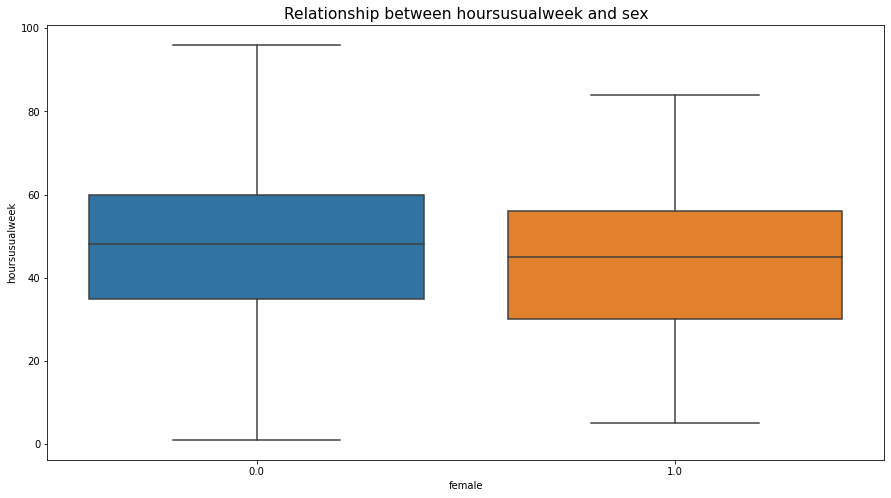

In [25]:
plt.figure(figsize=(15,8))
sns.boxplot(data = df_dummies, x = 'female', y = 'hoursusualweek', showfliers=False)
plt.title('Relationship between hoursusualweek and sex', fontdict = {'fontsize': 15.5});

In [26]:
# we see female entrepreneurs working less vs male on average; yet the top and buttom 25% ranges are bigger 
# for male entrepreneurs 

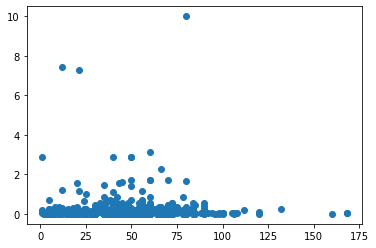

In [27]:
plt.scatter(df_dummies['hoursusualweek'], df_dummies['revenues'])

In [28]:
# So, workinh harder does not necessarily lead to higher revenues:)

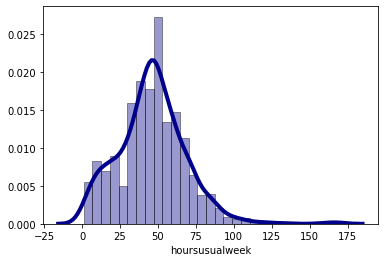

In [29]:
sns.distplot(df_dummies['hoursusualweek'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [30]:
# hoursusualweek is almost bimodal

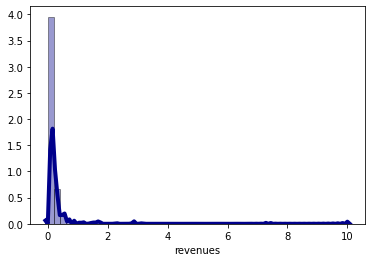

In [31]:
sns.distplot(df_dummies['revenues'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [41]:
# revenue data is more skewed (right)

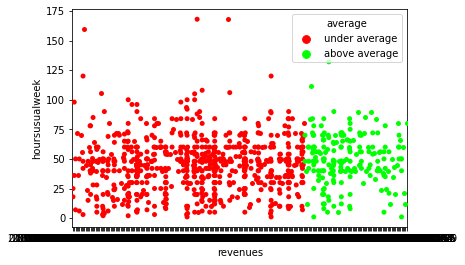

In [32]:
# a lot of other visualizations can be done, almost infinite:)

ave = sum(df_dummies['revenues'])/float(len(df_dummies['revenues']))
df_dummies['ave_line'] = ave
df_dummies['average'] = ['above average' if i > ave else 'under average' for i in df_dummies['revenues']]
sns.swarmplot(x='revenues', y = 'hoursusualweek', hue = 'average',data= df_dummies,
              palette={'above average':'lime', 'under average': 'red'})
plt.savefig('graph.png')

### Find the feature that has biggest Pearson correlation with dependent variable ("hoursusualweek") 

In [33]:
corr = df_dummies.corr()
num_with_target = pd.DataFrame(corr["hoursusualweek"].abs().sort_values(ascending = False)).reset_index()
num_with_target.columns = ['variable', 'corr_coef']

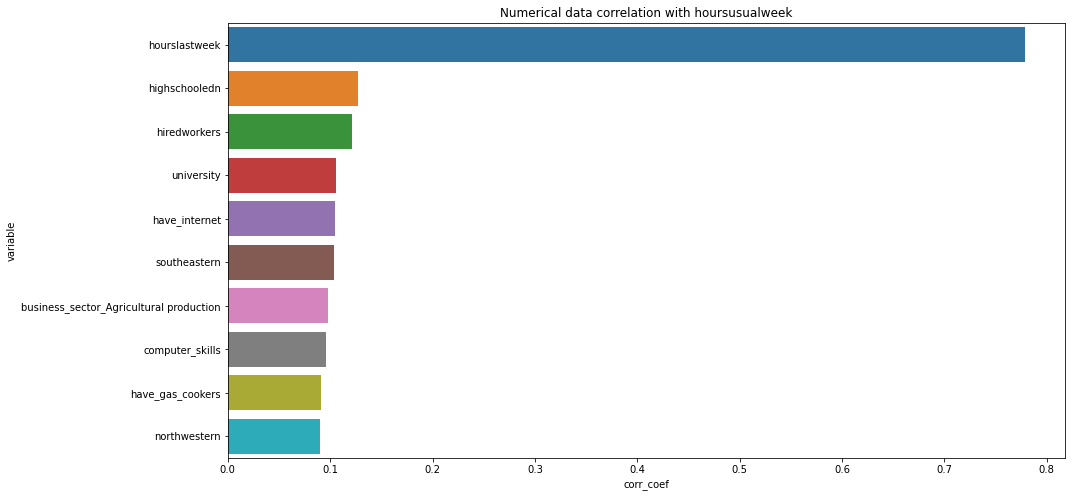

In [34]:
plt.figure(figsize=(15,8))
plt.title("Numerical data correlation with hoursusualweek")
sns.barplot(y = 'variable', x = "corr_coef", data = num_with_target[(num_with_target.variable != 'hoursusualweek')].head(10))
plt.show();

# so, the answer is hourslastweek

### Plot Heatmap 

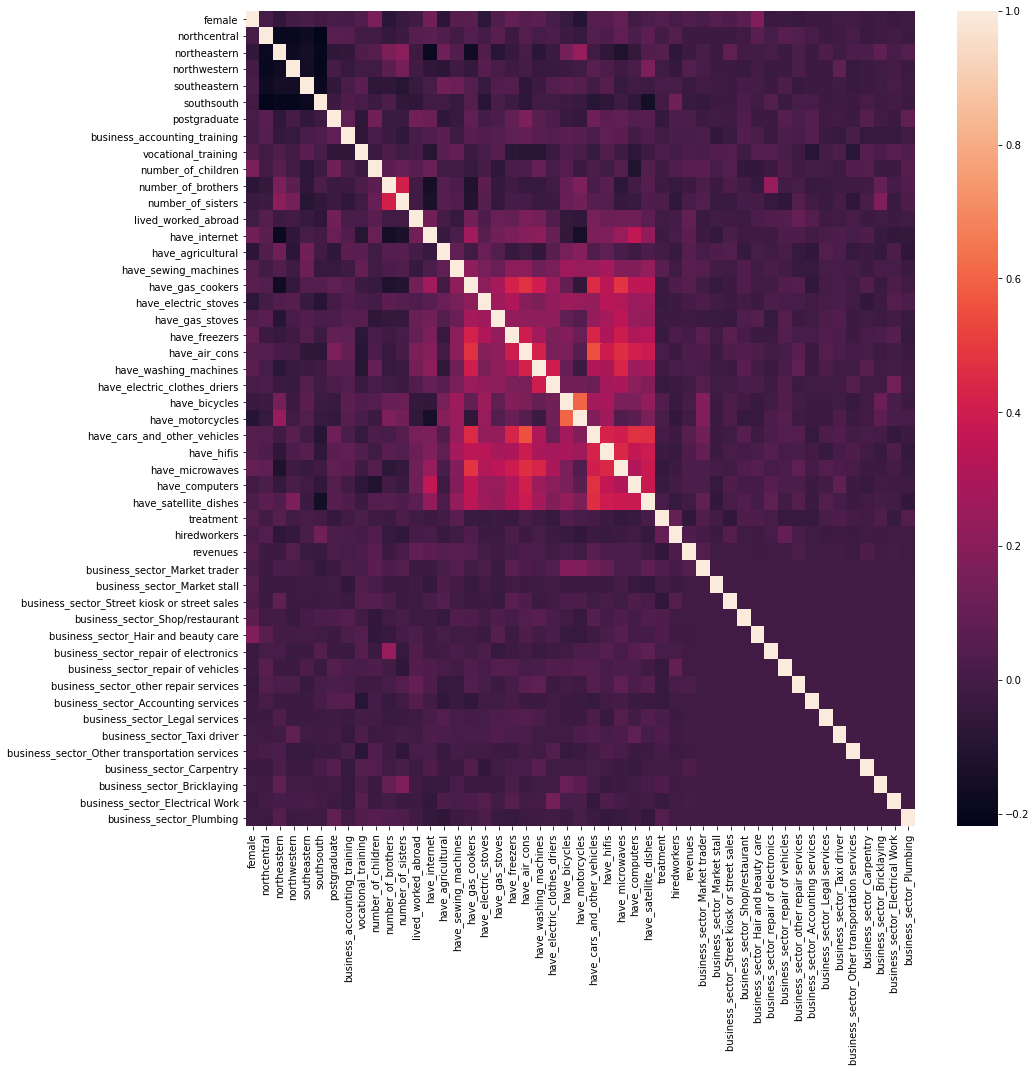

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=False)
plt.show()

### Use Feature Importance method from Decision Trees to find important variables and compare it with VIF findings

In [41]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y) # I didn't do train-test split as this is not an regular ML project

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

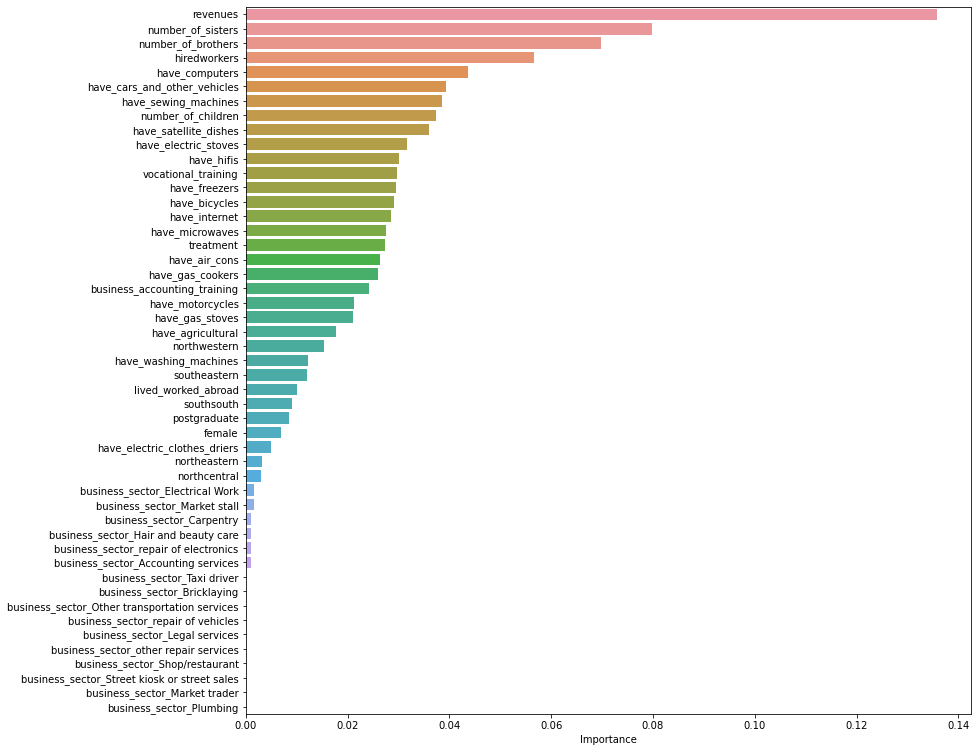

In [42]:
importances = dt.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(importance_df.Importance,importance_df.index)

In [43]:
# top5 features are revenues, # of sisters, # of brothers, hired workers and have computers
# of which all 5 have below 5 VIF (acceptable) while the most correlated feature with others is 'have computers' - Vif = 1.27